# Test for the CO2 forcing module

The effective radiative forcing of CO<sub>2</sub> is modeled with a conventional logarithmic form up to doubling concentration:
$$
F_x = \alpha \ln(x),
$$
where $x$ is the ratio of CO<sub>2</sub> concentration to its preindustrial value, and $\alpha$ is a scaling parameter in W/m<sup>2</sup>.

When exceeding the doubling level, the following quadratic form is used:
$$
\tilde{F_{x}}
= (\beta - 1)(F_{x} - 2 F_{2})(2 F_{x}/F_2 - 1) + \beta F_x,
$$
where $\beta$ is a non-dimensional parameter defined as $\tilde{F_4} = \beta \times F_4$, representing forcing amplification from the first to the second doubling.

The two equations are continuous at the doubling point.

In [2]:
import numpy as np
from mce.core.forcing import RfCO2
from mce.util.plot_base import PlotBase

In [3]:
forcing = RfCO2()
myplt = PlotBase()

In [4]:
print(forcing.parms)

alpha: CO2 scaling factor (W m-2)
beta: CO2 amplification factor (no_unit)
ccref: Base concentration of CO2 (ppm)


In [5]:
forcing.parms()

{'alpha': 4.617, 'beta': 1.068, 'ccref': 278.0}

In [6]:
# 1x, 2x, 4xCO2 forcing in W/m2
cco2_pi = forcing.parms.ccref
x = np.array([1, 2, 4])
ret = forcing.c2erf(cco2_pi * x)
ret

array([0.        , 3.20026053, 6.8357565 ])

In [7]:
# Consistency test for the doubling and quadrupling levels
q2x = forcing.parms.alpha * np.log(2)
q4x = q2x * 2 * forcing.parms.beta
ret[1] == q2x, ret[2] == q4x

(True, True)

In [8]:
# Consistency test for different computing methods
ret1 = forcing.x2erf(x)
ret2 = forcing.xl2erf(np.log(x))
np.array_equal(ret, ret1), np.array_equal(ret, ret2)

(True, True)

In [9]:
# Time series of a 1%-per-year increase experiment (1pctCO2)
# comparing different beta parameters
time = np.arange(141)
cco2 = cco2_pi * 1.01**time
xl = time * np.log(1.01)
beta_default = forcing.parms.beta
forcing.parms.update(beta=1.)
data = [ forcing.xl2erf(xl) ]
forcing.parms.update(beta=beta_default)
data.append( forcing.xl2erf(xl) )

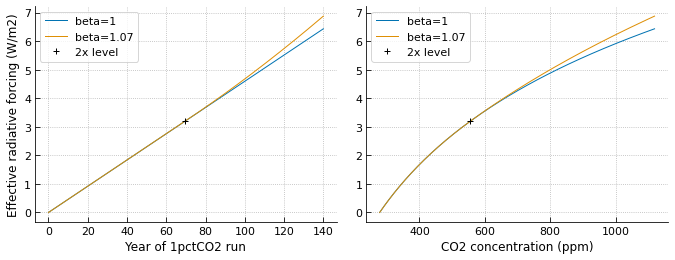

In [10]:
myplt.init_regular(2, col=2, kw_space={'wspace': 0.4})

ax = myplt(0)
ax.plot(time, data[0], label='beta=1')
ax.plot(time, data[1], label='beta={:.3g}'.format(beta_default))
t70 = np.log(2)/np.log(1.01)
ax.plot(t70, q2x, 'k+', label='2x level')
ax.set_xlabel('Year of 1pctCO2 run')
ax.set_ylabel('Effective radiative forcing (W/m2)')
ax.legend()
ax.grid()

ax = myplt(1)
ax.plot(cco2, data[0], label='beta=1')
ax.plot(cco2, data[1], label='beta={:.3g}'.format(beta_default))
ax.plot(2*cco2_pi, q2x, 'k+', label='2x level')
ax.set_xlabel('CO2 concentration (ppm)')
ax.legend()
ax.grid()